<a href="https://colab.research.google.com/github/hpamdeoxys/ZFairness/blob/main/zfairnesshehe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'compass:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1498%2F2680%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240329%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240329T073422Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7aa26d7350f5c0efedfe19d27805c28e22533b1185c49d4edbfcfdc7a009bfeab916278320012cb2c92dae064c34b4282741168c142aa1459e02170ce6b1063b4bae68e1cfa69859051fba55ffd140969dd8460d7436706a9056ab3ea21e28e23e57a72c22e7fcecec7a5189b6797a7ff21289492155a07e56ef4f77ec78ba40be7a30006a90722236c157e7c1c0de07407fd94c6e85537ddf68c63e5a869ad99415674eee22fb84c46d76872f4132875a91a4d4b744e88edbc68630d0bd9681590ab440a7385f83d05913a772ef882f7d768dba1c7e667f40bff0e182dc85647ce768c9bac80347980725a7025851e4678bff68b96d9a1edb36d5867cd6c085'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2852878 bytes downloaded
Downloaded and uncompressed: compass
Data source import complete.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/compass/cox-violent-parsed_filt.csv
/kaggle/input/compass/compas-scores-raw.csv
/kaggle/input/compass/cox-violent-parsed.csv
/kaggle/input/compass/propublicaCompassRecividism_data_fairml.csv/propublica_data_for_fairml.csv
/kaggle/input/compass/propublicaCompassRecividism_data_fairml.csv/._propublica_data_for_fairml.csv


In [ ]:
!pip install holisticai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 4.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/kaggle/input/compass/propublicaCompassRecividism_data_fairml.csv/propublica_data_for_fairml.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6172 entries, 0 to 6171
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Two_yr_Recidivism     6172 non-null   int64
 1   Number_of_Priors      6172 non-null   int64
 2   score_factor          6172 non-null   int64
 3   Age_Above_FourtyFive  6172 non-null   int64
 4   Age_Below_TwentyFive  6172 non-null   int64
 5   African_American      6172 non-null   int64
 6   Asian                 6172 non-null   int64
 7   Hispanic              6172 non-null   int64
 8   Native_American       6172 non-null   int64
 9   Other                 6172 non-null   int64
 10  Female                6172 non-null   int64
 11  Misdemeanor           6172 non-null   int64
dtypes: int64(12)
memory usage: 578.8 KB


This dataset contains 12 variables where the outcome is the 'Two_yr_Recidivism' column, which indicates whether a person commits a crime in the following two years or not. The remain columns include information about the criminal record, ethnicity, sex, on others.

In [ ]:
df.columns

Index(['Two_yr_Recidivism', 'Number_of_Priors', 'score_factor',
       'Age_Above_FourtyFive', 'Age_Below_TwentyFive', 'African_American',
       'Asian', 'Hispanic', 'Native_American', 'Other', 'Female',
       'Misdemeanor'],
      dtype='object')

To analize the bias in the model we will select the 'Hispanic' column as our protected attribute, feel free to select any column that you want to analyze, we can use the holisticai plotters to observe the proportions of the data and then perform a quick exploration.As we can see, the hispanic people only represents the 8% of the complete group.

In [ ]:
from holisticai.bias.plots import group_pie_plot

In [ ]:
p_attr = df['Hispanic']

<Axes: >

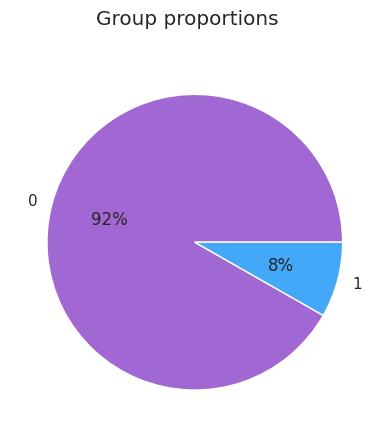

In [ ]:
group_pie_plot(p_attr)

As we can see, the hispanic people only represents the 8% of the complete group.

In [ ]:
df_enc = df.copy()
from sklearn.model_selection import train_test_split
from holisticai.bias.metrics import classification_bias_metrics
X = df_enc.drop(columns=['Two_yr_Recidivism'])
y = df_enc['Two_yr_Recidivism']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression

# training the model

LR = LogisticRegression(random_state=42, max_iter=500)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
# efficacy metrics from sklearn
from sklearn import metrics

# dictionnary of metrics
metrics_dict={
        "Accuracy": metrics.accuracy_score,
        "Balanced accuracy": metrics.balanced_accuracy_score,
        "Precision": metrics.precision_score,
        "Recall": metrics.recall_score,
        "F1-Score": metrics.f1_score}

def metrics_dataframe(y_pred, y_true, metrics_dict=metrics_dict):
    metric_list = [[pf, fn(y_true, y_pred)] for pf, fn in metrics_dict.items()]
    return pd.DataFrame(metric_list, columns=["Metric", "Value"]).set_index("Metric")

# compute efficacy metrics
metrics_dataframe(y_pred, y_test)
X = df_enc.drop(columns=['Two_yr_Recidivism'])
y = df_enc['Two_yr_Recidivism']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
group_a = X_test["Hispanic"]==0
group_b = X_test["Hispanic"]==1
y_pred  = LR.predict(X_test)
y_true  = y_test


,Value
Metric,
Accuracy,0.665227
Balanced accuracy,0.655317
Precision,0.648045
Recall,0.557692
F1-Score,0.599483


In [ ]:
metrics_dataframe(y_pred, y_test)

,Value
Metric,
Accuracy,0.665227
Balanced accuracy,0.655317
Precision,0.648045
Recall,0.557692
F1-Score,0.599483


from matplotlib import pyplot as plt
_df_5['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Value'].plot(kind='line', figsize=(8, 4), title='Value')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from holisticai.bias.metrics import classification_bias_metrics

In [ ]:
classification_bias_metrics(group_a, group_b, y_pred, y_true, metric_type='both')

,Value,Reference
Metric,,
Statistical Parity,0.190196,0
Disparate Impact,1.897487,1
Four Fifths Rule,0.527013,1
Cohen D,0.392790,0
2SD Rule,4.599563,0
Equality of Opportunity Difference,0.225641,0
False Positive Rate Difference,0.117001,0
Average Odds Difference,0.171321,0
Accuracy Difference,-0.018392,0
